In [1]:
#Importing the required Python libraries for this task:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset 
df = pd.read_csv('./IRIS.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Check the summary of the DataFrame df, including No. of rows &columns ,Column names, Non-null values, data types & Memory usage:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#Check if there are any missing values (NaN or None) in each column in the DataFrame df. This data set doesnt have any Null/Missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
#Print the first 5 rows of the dataset:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
#Display its unique values in the target column 'species' 
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
#Import python libraries to plot the data using a Count plot and a Scatter plot:
import seaborn as sns

<AxesSubplot: xlabel='species', ylabel='count'>

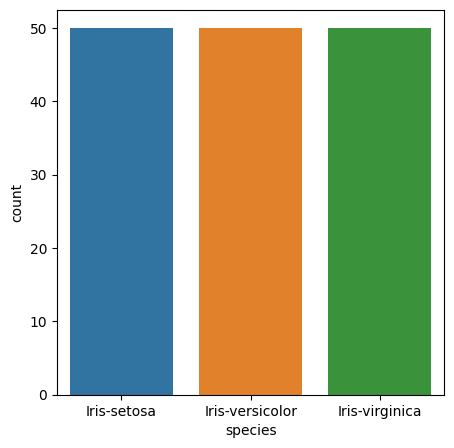

In [10]:
#count plot says there are 50 records for each species:
plot=plt.figure(figsize=(5,5))     #To creates a new figure object (plot) with width=height= 5inches using Matplotlib.
sns.countplot(x='species',data=df)  #Uses Seaborn (sns) to create a count plot for each unique value in the 'species' column (x='species')


In [11]:
#Error: could not convert string to float: 'Iris-setosa'. -Scatter plot function raise error if  dataset contains string data . So encode the string values in 'species' to numeric equivalents:
#Iris-setosa' becomes 0, 'Iris-versicolor' becomes 1, 'Iris-virginica' becomes 2
df.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)
#inplace=True: This parameter ensures that the changes are made directly to df without creating a new DataFrame.

<AxesSubplot: >

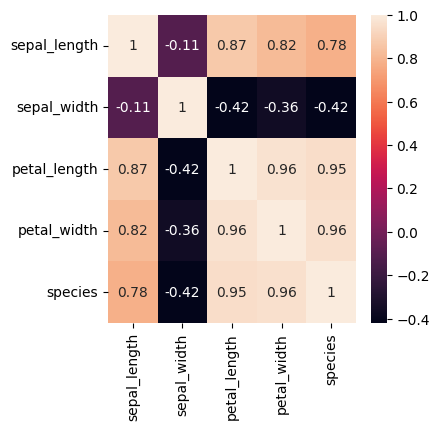

In [12]:
#Draw the graph:
plt.figure(figsize=(4,4)) #Sets up a new figure with height=width=4 inches, using Matplotlib
sns.heatmap(df.corr(),annot=True)  #df.corr(): Calculates the correlation coefficients between numeric columns in the DataFrame df, producing a square matrix where each element represents the correlation between two columns.
#annot=True: Displays the numeric values in each cell of the heatmap, which represent the correlation coefficients.

In [13]:
#To train the machine learning model, 1st split the dataset into training and testing subsets.
X=df.drop(columns='species') #X contain all columns excludes the column 'species'
Y=df['species'] #Y contain column 'species'
print(X)
print(Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split #train_test_split function from is used to split datasets into random train and test subsets

In [15]:
#Splits the dataset X and Y into training and testing sets, with 10% of the data used for testing.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

x_train

,sepal_length,sepal_width,petal_length,petal_width
77,6.7,3.0,5.0,1.7
114,5.8,2.8,5.1,2.4
110,6.5,3.2,5.1,2.0
139,6.9,3.1,5.4,2.1
39,5.1,3.4,1.5,0.2
...,...,...,...,...
45,4.8,3.0,1.4,0.3
118,7.7,2.6,6.9,2.3
41,4.5,2.3,1.3,0.3
127,6.1,3.0,4.9,1.8


In [16]:
#Train the classification model  using classifier algorithms.
#k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier #imports the KNN classifier from the sklearn.neighbors module.
knn=KNeighborsClassifier() #creates an instance of the KNN classifier. By default, it uses 5 neighbors.
knn.fit(x_train,y_train)#trains the KNN model using the training data (x_train and y_train).

KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score

In [34]:
#To train the classification model using the KNN algorithm:
x_train_prediction=knn.predict(x_train)
training_Data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:",training_Data_accuracy)


#accuracy on test data
x_test_prediction=knn.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.9703703703703703
accuracy on test data: 0.9333333333333333
